In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [4]:
ca_or = housing_raw.loc[housing_raw["region_name"]
    .str[-2:] # looking for the last two letters
    .isin(["CA", "OR", "WA"])] # only pulling these
    
ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617


In [5]:
ca_or = ca_or.assign(
    price_range =pd.cut(#cutting the "median_active_list_price" into 3 buckets
        ca_or.loc[:,"median_active_list_price"],
        [0,400000,600000,2000000], #setting the boundaries of the buckets
        labels=["0-400k", "400k-600k", "600k+"]), # labels for the buckets
    state = ca_or["region_name"].str[-2:] # creating state column to pivot on
)

In [6]:
ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_range,state
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,400k-600k,CA
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333,0-400k,WA
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000,0-400k,OR
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434,0-400k,WA
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617,400k-600k,WA


In [7]:
# creating a pivot table through a query of period ending
ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(index="price_range",
                                                             columns="state",
                                                             values="inventory",
                                                             aggfunc="sum")
ca_or.head()

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


<bound method Axes.legend of <Axes: title={'center': 'Unit Sales of Homes in CA and OR'}, ylabel='Homes Sold'>>

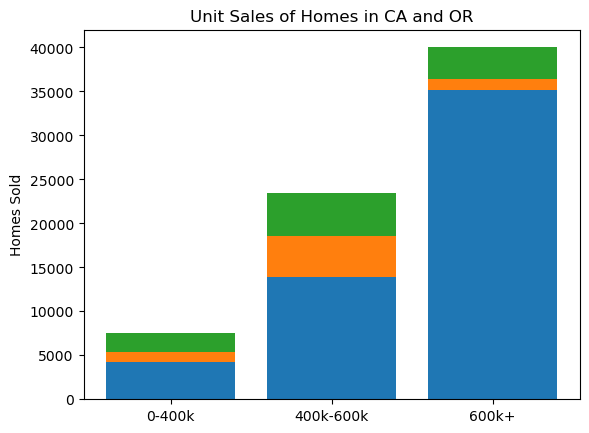

In [10]:
fig,ax=plt.subplots()

ax.bar(
    ca_or.index,
    ca_or["CA"],
    label="California"
)
ax.bar(
    ca_or.index,
    ca_or["OR"],
    label="Oregon",
    bottom=ca_or["CA"]
)
ax.bar(
    ca_or.index,
    ca_or["WA"],
    label="Washignton",
    bottom=ca_or["CA"] + ca_or["OR"]
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.legend()

   #### Grouped Bar Charts

<bound method Axes.legend of <Axes: title={'center': 'Unit Sales of Homes in CA and OR'}, ylabel='Homes Sold'>>

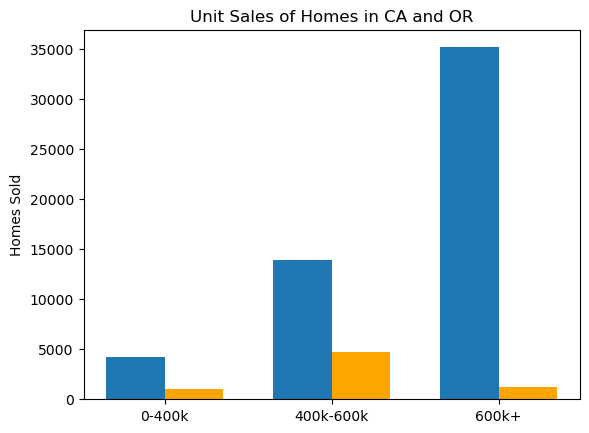

In [17]:
fig,ax=plt.subplots()

# in addition to the stacked
# add a width and a length of index
width=.35
x=np.arange(3)

ax.bar(
    #shift bars to left by half their width
    x-width/2,
    ca_or["CA"],
    #setting width
    width=width,
    label="California"
)
ax.bar(
    #shift bars to right by half their width
    x+width/2,
    ca_or["OR"],
    #setting width
    width=width,
    label="Oregon",
    color="orange"
)
# ax.bar(
#     ca_or.index,
#     ca_or["WA"],
#     label="Washignton",
#     c="green"
# )

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.set_xticks(x)
ax.set_xticklabels(ca_or.index)

ax.legend()

<Axes: xlabel='price_range'>

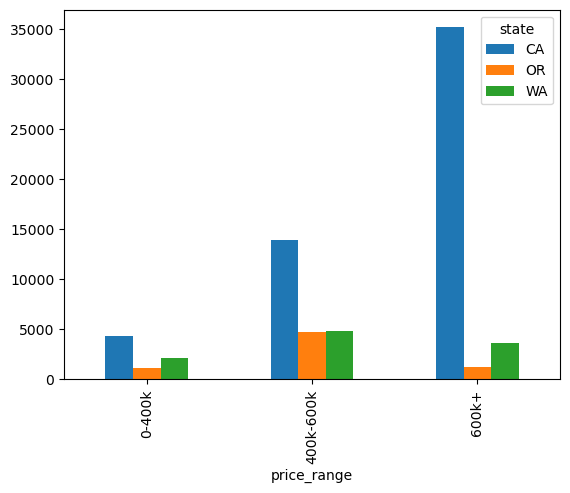

In [18]:
#quick run
ca_or.plot.bar()

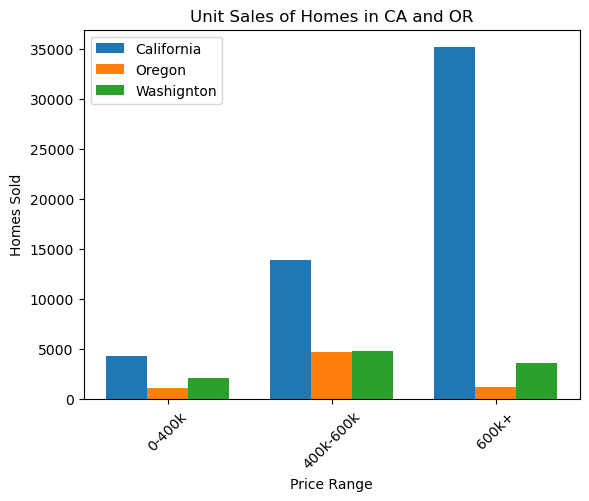

In [26]:
# plotting 3 bars
fig,ax=plt.subplots()

# in addition to the stacked
# add a width and a length of index
width=.25
# variables for the ranges
# first for the length of the object we are plotting
x1=np.arange(len(ca_or))
# second one is adding the width to each value in x1
x2=[x + width for x in x1]
# third one is adding the width to each value in x2
x3=[x + width for x in x2]

ax.bar(
    #shift bars to left by half their width
    x1,
    ca_or["CA"],
    #setting width
    width=width,
    label="California"
)
ax.bar(
    #shift bars to right by half their width
    x2,
    ca_or["OR"],
    #setting width
    width=width,
    label="Oregon",
)
ax.bar(
    x3,
    ca_or["WA"],
    width=width,
    label="Washignton",
)

ax.set_title("Unit Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.set_xlabel("Price Range")
# ax.set_xticks(x2)
# ax.set_xticklabels(ca_or.index)

# can use in place of the 2 "ax" lines above
plt.xticks(
    x2,
    ca_or.index,
    rotation=45
)

ax.legend();

   #### Combo Chart!

In [28]:
ca_housing = (housing_raw
    .loc[(housing_raw["region_name"]
    .str.contains("CA"))]
    #deleting the last 11 spaces in "region_name"(i.e."County,GA")
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin")
)

In [32]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2020-06-22,Sacramento,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
2018-09-03,Nevada,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
2017-06-05,Stanislaus,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
2020-01-20,Tehama,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
2017-11-13,Stanislaus,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [33]:
sd_dual = (
    ca_housing.loc[ca_housing["region_name"] == "San Diego",
                  ["inventory","median_active_list_price"]]
).sort_index()

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


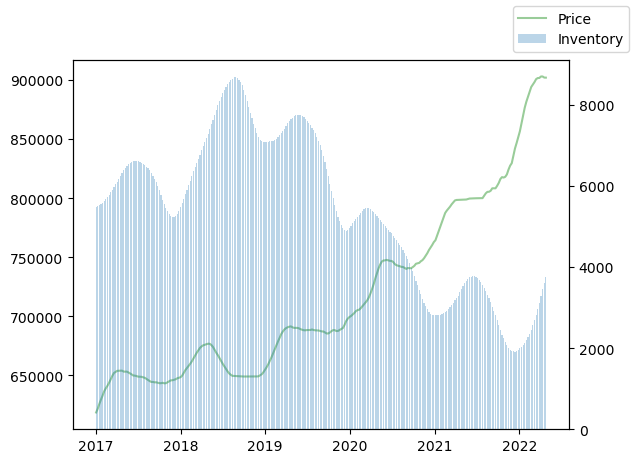

In [35]:
fig,ax = plt.subplots()

width = 5

ax.plot(
    sd_dual["median_active_list_price"],
    color="green",
    alpha=.4,
    label="Price"
)
#ax.legend()

ax2=ax.twinx()
ax2.bar(sd_dual.index,
       sd_dual["inventory"],
       width=width,
       alpha=.3,
       label="Inventory"
       )
#ax2.legend()

fig.legend()

In [36]:
# to get a cleaner look we can aggregate using the resample on year
sd_dual2 = sd_dual.resample("Y").mean()

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


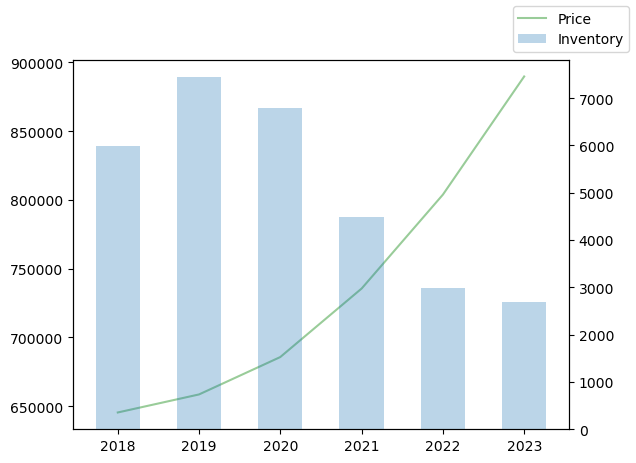

In [38]:
fig,ax = plt.subplots()

width = 200

ax.plot(
    sd_dual2["median_active_list_price"],
    color="green",
    alpha=.4,
    label="Price"
)
#ax.legend()

ax2=ax.twinx()
ax2.bar(sd_dual2.index,
       sd_dual2["inventory"],
       width=width,
       alpha=.3,
       label="Inventory"
       )
#ax2.legend()

fig.legend()